<a href="https://colab.research.google.com/github/AQIL21B6005/GPCAsg1/blob/master/Assignment_2_Build_an_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Make sure your compute resource is set to GPU else you'll need to reset your session from scratch**

---
Group yourself to 3 max, and fill in below details
Group member detail(s): \
1. Mohammad Aqil Akmal Bin Ahmad - 21B6005

Some of the concepts may be technically advanced, instead, it is to focus on learning how to effectively use Google Colab for scientific research. Don't fret if you dont understand any of codes written for you.

# Setting up Environment

Task 1: Set Up the Environment \
Import the necessary libraries for the exercise, PyTorch for neural network training.\
Load the CIFAR10 dataset.


In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

In [2]:
# Set the device to GPU if available, otherwise, use CPU
device = torch.device('cuda' if torch.cuda.is_available() else'cpu')
# device = torch.device('cpu') train using CPU

In [3]:
# Define the modified neural network architecture for CIFAR-10
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(8 * 8 * 32, 128)  # Adjusted for CIFAR-10 image size
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)  # Output size matches the number of CIFAR-10 classes (10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 8 * 8 * 32)  # Adjusted for CIFAR-10 image size
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x

In [7]:
!git clone https://github.com/AQIL21B6005/GPCAsg1.git

fatal: destination path 'GPCAsg1' already exists and is not an empty directory.
ls: cannot access 'https://github.com/AQIL21B6005/GPCAsg1.git': No such file or directory


Below are the Hyperparameters for the neural network (think of it as knobs that you can tune to enhance performance)


Task 4: Model debugging (Mess around with these 3 hyperparameters) \
hint: \
LEARNING_RATE: The current value is set to 1e10 (10000000000.0). Try adjusting it to find an optimal learning rate.\
BATCH_SIZE: Set it to a power of 2, such as 16, 32, or 64, to potentially improve training efficiency. \
EPOCH: Consider letting the model train for more epochs. The default value is set to 1; experiment with longer training durations for better convergence and performance evaluation.

In [4]:
BATCH_SIZE = 2
LEARNING_RATE = 1e3
EPOCH = 5

In [5]:
# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.to(device)
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        correct_predictions = 0  # Initialize a counter for correct predictions
        total_samples = 0  # Initialize a counter for total samples

        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

             # Measure accuracy
            _, predicted = torch.max(outputs, 1)
            correct_predictions += (predicted == labels).sum().item()
            total_samples += labels.size(0)

        # Calculate accuracy for the current epoch
        accuracy = 100.0 * correct_predictions / total_samples
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}, Accuracy: {accuracy}")
    print("Training complete!")


In [6]:
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transforms)

100%|██████████| 170498071/170498071 [00:14<00:00, 11937208.95it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data


In [7]:
# Load and preprocess the CFAR10 dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
#TODO: Complete below line to import CIFAR10 dataset
train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

Files already downloaded and verified


In [8]:
train_set.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [9]:
# Create the model, loss function, and optimizer
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

Task 2: Measure performance difference training between GPU and CPU


In [10]:
# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs=EPOCH)

Epoch 1/5, Loss: nan, Accuracy: 10.002
Epoch 2/5, Loss: nan, Accuracy: 10.0
Epoch 3/5, Loss: nan, Accuracy: 10.0
Epoch 4/5, Loss: nan, Accuracy: 10.0
Epoch 5/5, Loss: nan, Accuracy: 10.0
Training complete!


Report your findings on:
*   What were the key differences you observed in the training speed between the GPU and CPU?

Answer: GPU has significantly faster training speed compare to CPU. GPU finished training the model by 5 minutes and CPU finished training the model by 7 minutes. GPU is faster by 2 minutes than CPU.
*   Were there any challenges or limitations you encountered while using the GPU for training?

Answer: Larger models have to be optimized. We have to optimize the model architecture and use smaller batch sizes.

*   Did you notice any impact on the final model's performance (accuracy, loss) when trained on the GPU versus the CPU?

Answer: There are no differences in terms of accuracy and loss. The differences in training speed and hardware utilization between GPU and CPU has made no difference in the result and quality of the trained model.

Task 3: Visualize Loss and Accuracy


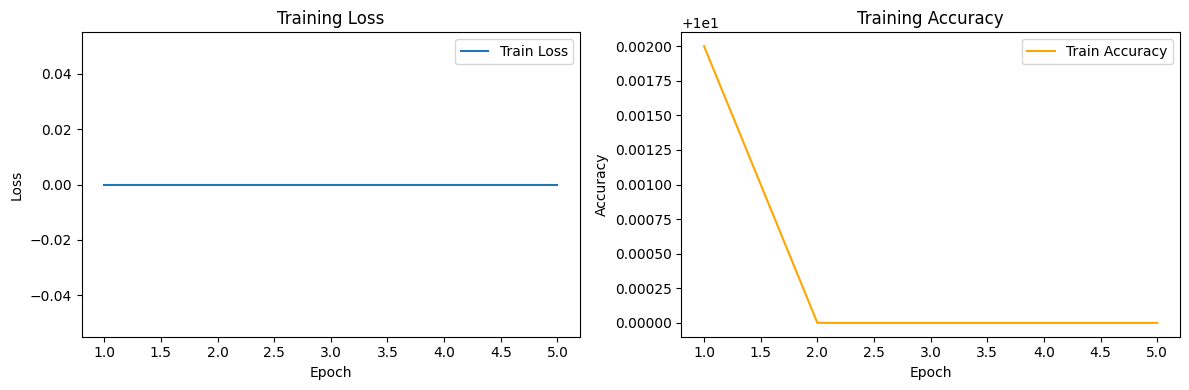

In [11]:
#TODO:
#Your plots goes here

import matplotlib.pyplot as plt

epochs = [1, 2, 3, 4, 5]
train_loss = [0, 0, 0, 0, 0]
train_accuracy = [10.002, 10.0, 10.0, 10.0, 10.0]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

ax1.plot(epochs, train_loss, label='Train Loss')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training Loss')
ax1.legend()

ax2.plot(epochs, train_accuracy, label='Train Accuracy', color='orange')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.set_title('Training Accuracy')
ax2.legend()

plt.tight_layout()
plt.show()

Task 4: Test your own Image \
You can use the same code from the tutorial and ensure your model is properly trained!



In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from google.colab import files
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(7 * 7 * 32, 128)
        self.relu3 = nn.ReLU()
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = self.relu1(x)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.relu2(x)
        x = self.pool2(x)
        x = x.view(-1, 7 * 7 * 32)
        x = self.fc1(x)
        x = self.relu3(x)
        x = self.fc2(x)
        return x


In [2]:
# Function to train the model
def train_model(model, train_loader, criterion, optimizer, num_epochs=5):
    model.to(device)
    model.train()
    for epoch in range(num_epochs):
        running_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
        print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss/len(train_loader):.4f}")
    print("Training complete!")


In [3]:
BATCH_SIZE = 64
EPOCH = 20
LEARNING_RATE = 1e-3

# Changing the batch size, epoch and learning rate to find the optimal time and performance.
# Generally the loss should decrease as each epoch finish. Reduce epoch to prevent overfitting.
# Batch size depends on the size of the dataset. Larger batch size is better for convergence, while smaller batch is usually for generalization.
# High learning rate can cause training to overshoot the optimal solution.
# Low learning rate can slow down training.

In [ ]:
# Load and preprocess the MNIST dataset
transform = transforms.Compose([transforms.Resize((28, 28)), transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
train_loader = DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True)

In [5]:
# Function to display a batch of images
def show_images(images):
    # Convert the tensor to NumPy array and adjust the range from [0, 1] to [0, 255]
    images = (images * 255).astype('uint8')

    # Create a grid of images (assuming images is a tensor with shape [batch_size, channels, height, width])
    grid = torchvision.utils.make_grid(images, nrow=8, padding=2)

    # Plot the grid
    plt.figure(figsize=(10, 10))
    plt.imshow(grid.permute(1, 2, 0))  # Permute the dimensions to [height, width, channels]
    plt.axis('off')  # Turn off axis labels
    plt.show()

In [6]:
trainset.classes

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [7]:
model = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=LEARNING_RATE, momentum=0.9)

In [8]:
train_model(model, train_loader, criterion, optimizer, num_epochs=EPOCH)

Epoch 1/20, Loss: 1.1255
Epoch 2/20, Loss: 0.2381
Epoch 3/20, Loss: 0.1438
Epoch 4/20, Loss: 0.1055
Epoch 5/20, Loss: 0.0870
Epoch 6/20, Loss: 0.0751
Epoch 7/20, Loss: 0.0681
Epoch 8/20, Loss: 0.0614
Epoch 9/20, Loss: 0.0559
Epoch 10/20, Loss: 0.0510
Epoch 11/20, Loss: 0.0483
Epoch 12/20, Loss: 0.0448
Epoch 13/20, Loss: 0.0423
Epoch 14/20, Loss: 0.0398
Epoch 15/20, Loss: 0.0377
Epoch 16/20, Loss: 0.0350
Epoch 17/20, Loss: 0.0331
Epoch 18/20, Loss: 0.0325
Epoch 19/20, Loss: 0.0301
Epoch 20/20, Loss: 0.0285
Training complete!


In [ ]:
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize the image to match the model input size
    transforms.ToTensor(),  # Convert the image to a tensor
   transforms.Normalize((0.5,), (0.5,)),  # Normalize the image
])

# Function to preprocess and make predictions on the uploaded image
def predict_uploaded_image(upload):
    # Open the uploaded image
    image = Image.open(upload).convert('L')
    model.to("cpu")  # Set the model to evaluation mode

    # Preprocess the image
    input_tensor = transform(image)
    input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension

    # Make predictions using the model
    with torch.no_grad():
        output = model(input_batch)
    _, predicted_idx = torch.max(output, 1)

    print(f"Predicted labels: {predicted_idx}")

In [ ]:
# Upload an image for prediction
uploaded = files.upload()

# If an image is uploaded, call the prediction function
if len(uploaded) > 0:
    for file_name in uploaded.keys():
        predict_uploaded_image(file_name)
else:
    print("No image uploaded.")
